In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
m = len(housing)
m

545

In [4]:
housing.shape

(545, 13)

In [5]:
#List of variables that have string values
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Map Function (Yes = 1, No = 0)
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

#Applying function to housing list
housing[varlist] = housing[varlist].apply(binary_map)

#Checking housing dataframe
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
#Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

#Specify this so the training and testing data sets have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape, df_test.shape

((436, 13), (109, 13))

In [7]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,2,1,1,1,0,0,0,0,0,0,1750000
496,4000,2,1,1,1,0,0,0,0,0,0,2695000
484,3040,2,1,1,0,0,0,0,0,0,0,2870000
507,3600,2,1,1,1,0,0,0,0,0,0,2590000
252,9860,3,1,1,1,0,0,0,0,0,0,4515000


In [8]:
Y_Normtrain = df_Newtrain.pop('price')
X_Normtrain = df_Newtrain.copy()
Y_Normtest = df_Newtest.pop('price')
X_Normtest = df_Newtest.copy()

In [9]:
df_Newtrain.shape

(436, 11)

In [10]:
X1 = X_Normtrain.values[:, 0] #Area values
X2 = X_Normtrain.values[:, 1] #Bedroom values
X3 = X_Normtrain.values[:, 2] #Bathroom values
X4 = X_Normtrain.values[:, 3] #Stories values
X5 = X_Normtrain.values[:, 4] #Mainroad values
X6 = X_Normtrain.values[:, 5] #Guestroom values
X7 = X_Normtrain.values[:, 6] #Basement values
X8 = X_Normtrain.values[:, 7] #Hotwaterheating values
X9 = X_Normtrain.values[:, 8] #AC values
X10 = X_Normtrain.values[:, 9] #Parking values
X11 = X_Normtrain.values[:, 10] #Prefarea values

X1_test = X_Normtest.values[:, 0] #Area values
X2_test = X_Normtest.values[:, 1] #Bedroom values
X3_test = X_Normtest.values[:, 2] #Bathroom values
X4_test = X_Normtest.values[:, 3] #Stories values
X5_test = X_Normtest.values[:, 4] #Mainroad values
X6_test = X_Normtest.values[:, 5] #Guestroom values
X7_test = X_Normtest.values[:, 6] #Basement values
X8_test = X_Normtest.values[:, 7] #Hotwaterheating values
X9_test = X_Normtest.values[:, 8] #AC values
X10_test = X_Normtest.values[:, 9] #Parking values
X11_test = X_Normtest.values[:, 10] #Prefarea values

Y = Y_Normtrain.values #Pricing values
Y_test = Y_Normtest.values #Pricing values

#hstack() function from numpy to have X_0 and X_1 in one final Matrix
#X = np.hstack((X_0, X_1))
#X[:5]

In [11]:
m_train = len(Y_Normtrain)
m_test = len(Y_Normtest)
m_train, m_test

(436, 109)

In [12]:
X_0 = np.ones((m_train, 1))
X_0_test = np.ones((m_test, 1))

In [13]:
#Reshape function used to convert X from 1D to 2D array of m x 1
X_1 = X1.reshape(m_train, 1)
X_2 = X2.reshape(m_train, 1)
X_3 = X3.reshape(m_train, 1)
X_4 = X4.reshape(m_train, 1)
X_5 = X5.reshape(m_train, 1)
X_6 = X6.reshape(m_train, 1)
X_7 = X7.reshape(m_train, 1)
X_8 = X8.reshape(m_train, 1)
X_9 = X9.reshape(m_train, 1)
X_10 = X10.reshape(m_train, 1)
X_11 = X11.reshape(m_train, 1)

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)

In [25]:
#hstack() function from numpy to have X_0 to X_11 in one final Matrix
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11))
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test))

In [29]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
def compute_cost(X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 *m) * np.sum(sqrErrors)
    
    return J

In [31]:
cost = compute_cost(X, Y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 10587991986906.973


In [32]:
def gradient_descent(X, Y, theta, aplha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, Y, theta)
        
    return theta, cost_history

In [44]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta_test = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 10000;
alpha = 0.00000000001;

In [45]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
theta_test, cost_history_test = gradient_descent(X_test, Y_test, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('Final value of theta_test =', theta_test)
print('cost_history_test =', cost_history_test)

Final value of theta = [1.58119375e-01 7.89556093e+02 5.00650251e-01 2.32055464e-01
 3.34346893e-01 1.42913817e-01 3.90496390e-02 6.54375709e-02
 1.03686966e-02 7.26691766e-02 1.36033524e-01 5.17751278e-02]
cost_history = [1.05834018e+13 1.05788139e+13 1.05742283e+13 ... 1.42732724e+12
 1.42729558e+12 1.42726392e+12]
Final value of theta_test = [1.70106422e-01 8.10819249e+02 5.40423379e-01 2.53519155e-01
 3.67053834e-01 1.52629146e-01 4.16279249e-02 7.12908015e-02
 1.07629421e-02 8.06221246e-02 1.42240716e-01 5.53625123e-02]
cost_history_test = [3.14449011e+11 3.14448187e+11 3.14447362e+11 ... 3.09778509e+11
 3.09778277e+11 3.09778046e+11]


Text(0.5, 1.0, 'Convergence of gradient descent')

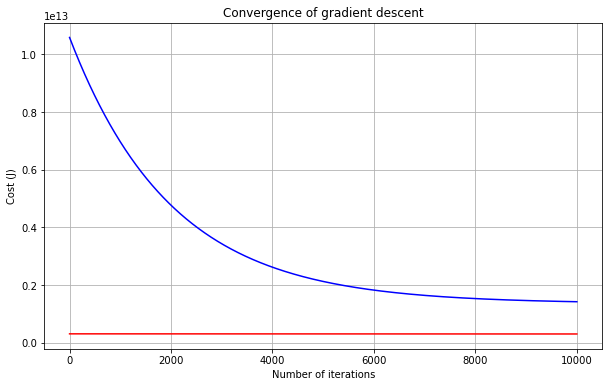

In [46]:
plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.plot(range(1, iterations + 1), cost_history_test, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')